In [3]:
!pip install lifelines

In [4]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
sns.set_style('darkgrid')
sns.set_palette('rainbow')

In [5]:
# Loading the the survival un-employment data
survival_unemp = pd.read_csv("https://raw.githubusercontent.com/snehal-excelr/DS_Python/main/survival_unemployment.csv")

In [6]:
survival_unemp.head()

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


In [7]:
survival_unemp.describe()

,spell,event,ui,logwage,age
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797,5.692994,35.443314
std,5.611271,0.466919,0.497279,0.535659,10.640204
min,1.000000,0.000000,0.000000,2.708050,20.000000
25%,2.000000,0.000000,0.000000,5.298320,27.000000
50%,5.000000,0.000000,1.000000,5.676750,34.000000
75%,9.000000,1.000000,1.000000,6.052090,43.000000
max,28.000000,1.000000,1.000000,7.600400,61.000000


In [8]:
survival_unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   spell    3343 non-null   int64  
 1   event    3343 non-null   int64  
 2   ui       3343 non-null   int64  
 3   logwage  3343 non-null   float64
 4   age      3343 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 130.7 KB


In [9]:
# Spell is referring to time
T = survival_unemp.spell
T

0        5
1       13
2       21
3        3
4        9
        ..
3338    11
3339     4
3340     5
3341     1
3342     8
Name: spell, Length: 3343, dtype: int64

In [10]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

<Axes: xlabel='timeline'>

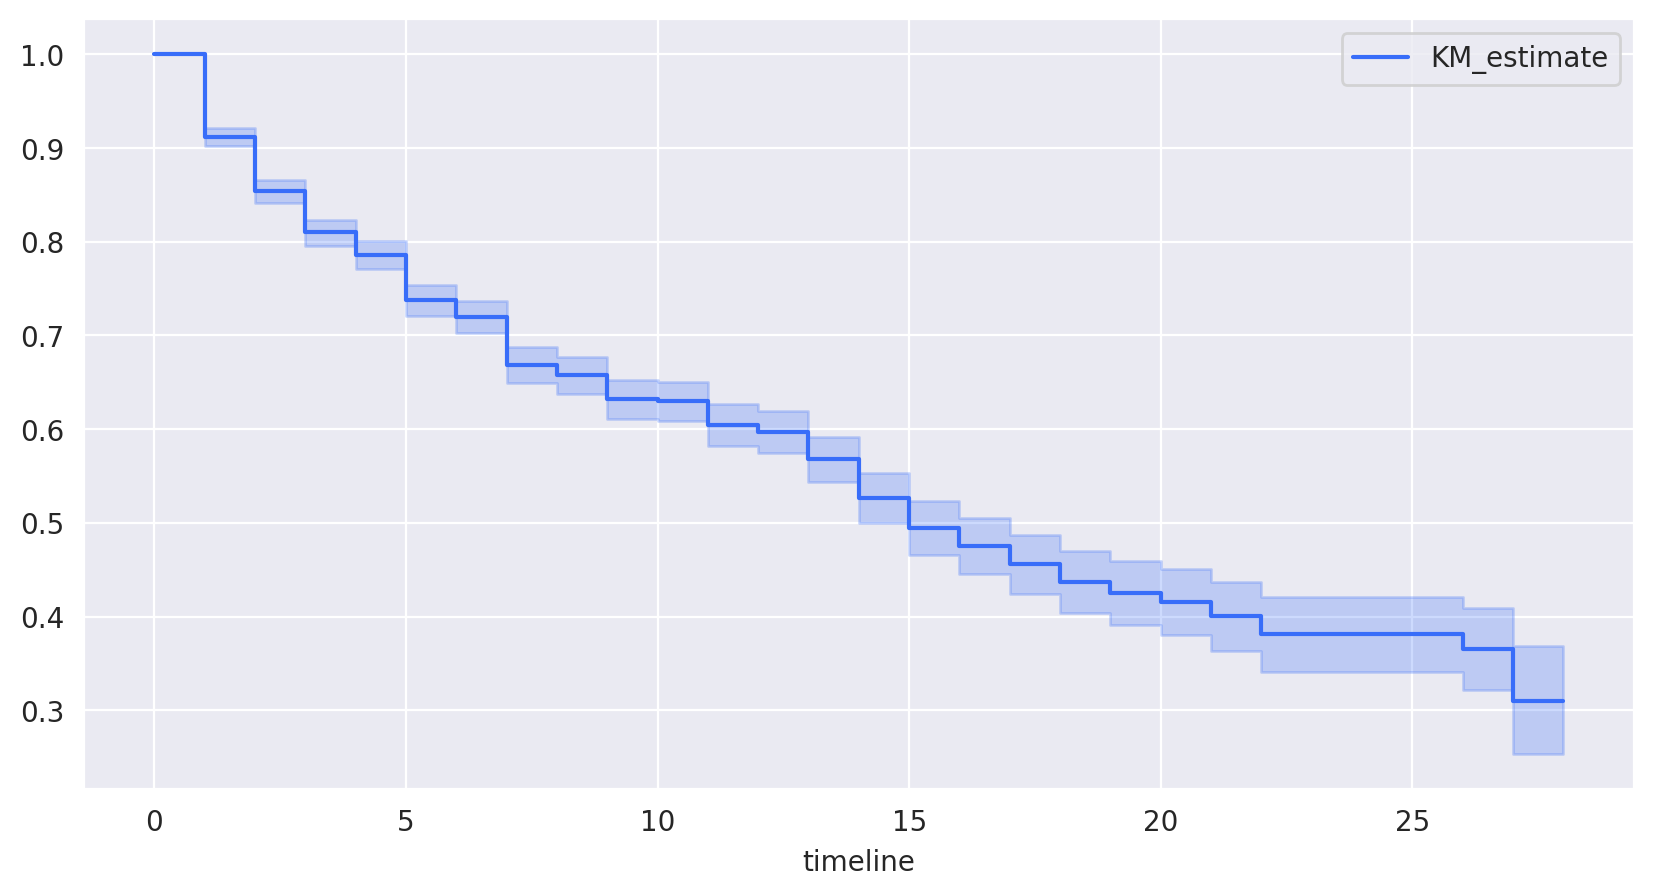

In [11]:
# Fitting KaplanMeierFitter model on Time and Events for death
kmf.fit(T,event_observed=survival_unemp.event)# T - time, event_obsserved: whether event occurred or not
# Time-line estimations plot
kmf.plot()
# This is K-M estimation curve. Shaded region is 95% confidence interval.

In [12]:
# Over Multiple groups
# For each group, here group is ui - unemployment insurance
survival_unemp.ui.value_counts()

1    1848
0    1495
Name: ui, dtype: int64

In [14]:
T[survival_unemp.ui==1]

1       13
2       21
3        3
4        9
5       11
        ..
3337     5
3338    11
3339     4
3340     5
3342     8
Name: spell, Length: 1848, dtype: int64

<Axes: xlabel='timeline'>

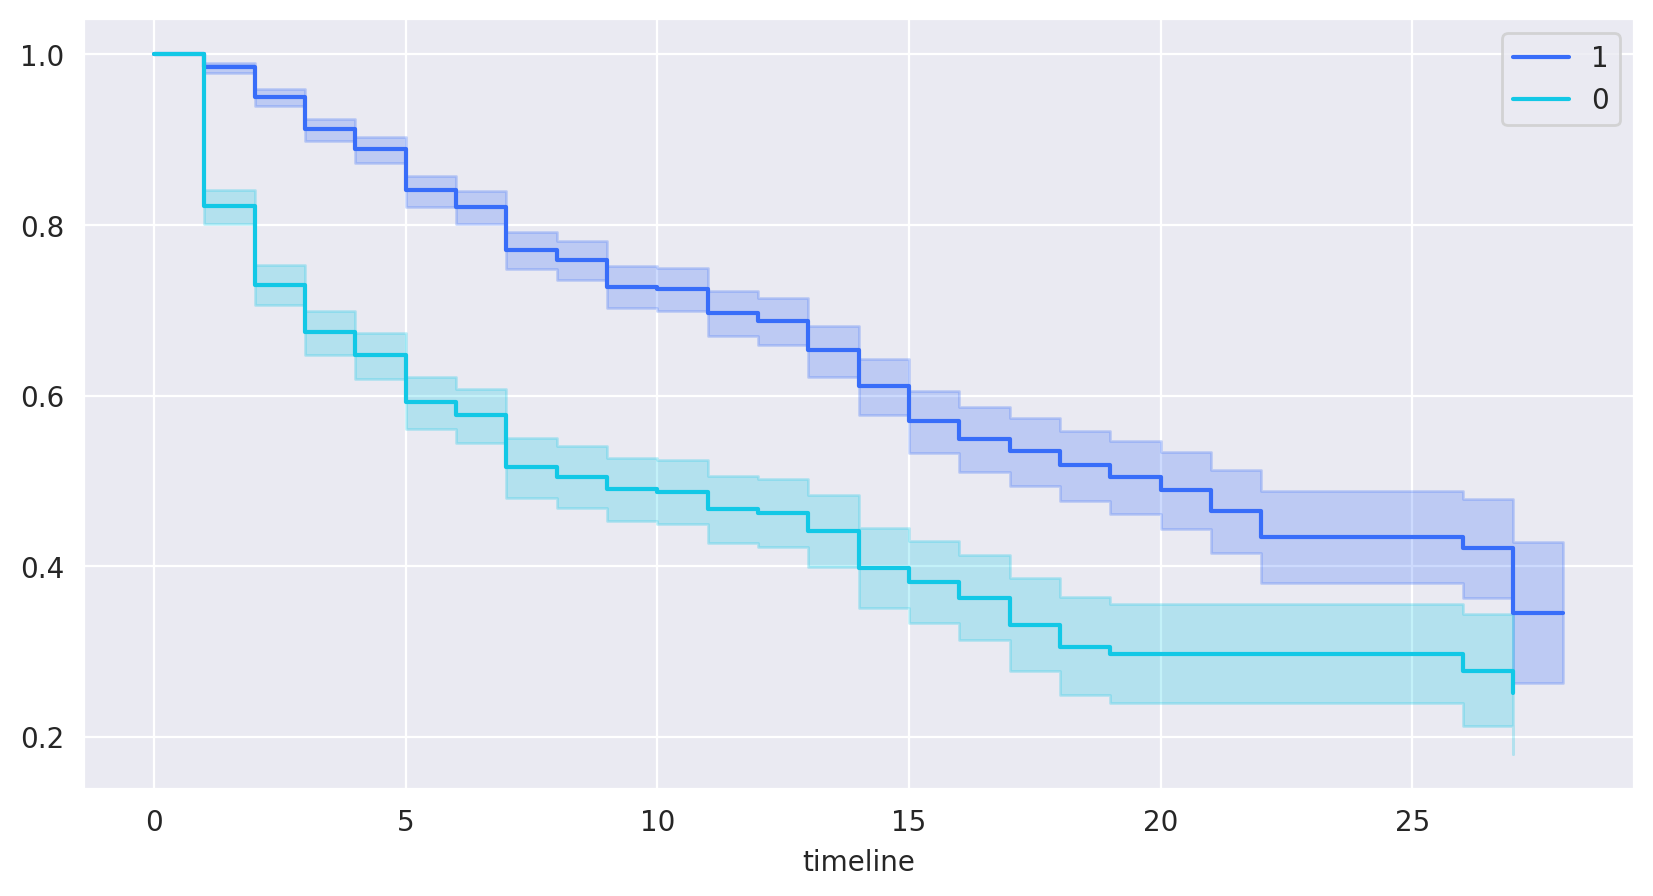

In [15]:
# comparison of 2 groups
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[survival_unemp.ui==1], survival_unemp.event[survival_unemp.ui==1], label='1')
ax = kmf.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[survival_unemp.ui==0], survival_unemp.event[survival_unemp.ui==0], label='0')
kmf.plot(ax=ax)
